# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.677763e+01     1.186394e+01
 * time: 0.0017421245574951172
     1     3.641248e+01     8.023625e+00
 * time: 0.005499124526977539
     2     2.544327e+01     3.635351e+00
 * time: 0.011868000030517578
     3     2.271474e+01     3.664593e+00
 * time: 0.01727604866027832
     4     2.107342e+01     3.365314e+00
 * time: 0.022796154022216797
     5     2.009277e+01     2.067800e+00
 * time: 0.02897500991821289
     6     1.978312e+01     3.333630e+00
 * time: 0.06943917274475098
     7     1.943736e+01     2.962297e+00
 * time: 0.07408499717712402
     8     1.879642e+01     2.033399e+00
 * time: 0.07834815979003906
     9     1.830332e+01     1.873003e+00
 * time: 0.08255219459533691
    10     1.793061e+01     1.092792e+00
 * time: 0.08676409721374512
    11     1.769722e+01     9.882129e-01
 * time: 0.09085202217102051
    12     1.755914e+01     8.006413e-01
 * time: 0.09492206573486328
    13     1.752595e+01     8.184496e-01
 * 

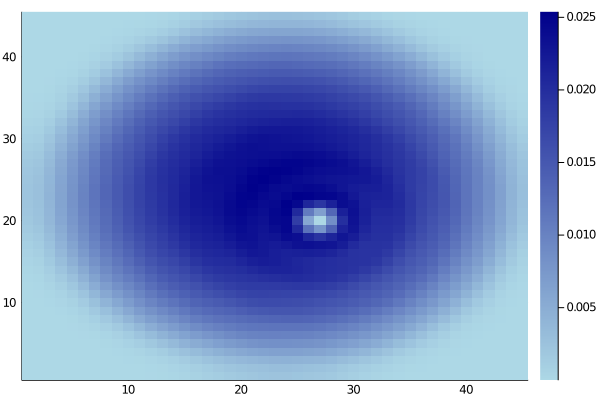

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)